In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_test=pd.read_csv('../inputs/Test.csv')
df_train=pd.read_csv('../inputs/Train.csv')

In [3]:
df_train.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,ps_id-24654,Finance,4.18,1481,Varies with device,Free,Everyone,May 05 2020,Varies with device,Varies with device,"100,000+"
1,ps_id-35329,Music And Audio,4.81,302,10M,Free,Everyone,Mar 26 2020,3.9.18,4.1 and up,"5,000+"
2,ps_id-11044,Game Casual,4.27,374,27M,Free,Everyone,May 01 2020,1.10.1,4.1 and up,"10,000+"
3,ps_id-36068,Business,4.03,122058,Varies with device,Free,Teen,May 02 2020,Varies with device,Varies with device,"10,000,000+"
4,ps_id-35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,"5,000+"


In [14]:
df_train.shape,df_test.shape

((16516, 11), (24776, 10))

In [9]:
print(df_train.isnull().sum())
df_test.isnull().sum()

Offered_By             0
Category               0
Rating                 0
Reviews                0
Size                   0
Price                  0
Content_Rating         0
Last_Updated_On        0
Release_Version        0
OS_Version_Required    0
Downloads              0
dtype: int64


Offered_By             0
Category               0
Rating                 0
Reviews                0
Size                   0
Price                  0
Content_Rating         0
Last_Updated_On        0
Release_Version        0
OS_Version_Required    0
dtype: int64

In [13]:
for f in df_train.columns:
    print(f)
    print(df_train[f].unique()),
    print(df_train[f].nunique())

Offered_By
['ps_id-24654' 'ps_id-35329' 'ps_id-11044' ... 'ps_id-5583' 'ps_id-15485'
 'ps_id-4549']
15520
Category
['Finance' 'Music And Audio' 'Game Casual' 'Business' 'Medical'
 'Books And Reference' 'Tools' 'Game' 'Travel And Local' 'Family'
 'Game Simulation' 'Lifestyle' 'Comics' 'Education' 'Entertainment'
 'Game Action' 'Social' 'Sports' 'Photography' 'Game Word' 'Game Trivia'
 'Communication' 'News And Magazines' 'Game Board' 'House And Home'
 'Personalization' 'Game Puzzle' 'Productivity' 'Health And Fitness'
 'Shopping' 'Art And Design' 'Weather' 'Maps And Navigation' 'Dating'
 'Game Arcade' 'Game Role Playing' 'Game Educational' 'Video Players'
 'Game Strategy' 'Food And Drink' 'Game Sports' 'Auto And Vehicles'
 'Events' 'Game Adventure' 'Parenting' 'Libraries And Demo' 'Game Racing'
 'Game Card' 'Game Music' 'Game Casino' 'Beauty']
51
Rating
[4.18 4.81 4.27 4.03 4.6  4.8  4.62 3.2  4.1  3.8  4.3  3.25 4.48 4.57
 4.2  4.56 4.39 3.17 4.08 4.32 3.5  4.44 4.53 4.83 4.51 4.14 4. 

In [40]:
df_train.groupby(['OS_Version_Required'])['Downloads'].count()

OS_Version_Required
1.0 and up               1
1.1 and up               1
1.5 and up              36
1.6 and up              62
2.0 and up              29
2.0.1 and up             9
2.1 and up             116
2.2 and up             252
2.3 and up             753
2.3.3 and up           288
3.0 and up             235
3.1 and up              12
3.2 and up              29
4.0 and up            1894
4.0.3 and up          2549
4.1 and up            4363
4.2 and up             689
4.3 and up             348
4.4 and up            1831
4.4w and up             15
5.0 and up            1283
5.1 and up              65
6.0 and up             140
7.0 and up              48
7.1 and up               5
8.0 and up              12
Varies with device    1451
Name: Downloads, dtype: int64

In [4]:
df_train_dup=df_train.drop_duplicates()
df_test_dup=df_test.drop_duplicates()
full_df=pd.concat([df_train_dup,df_test_dup],axis=0).reset_index(drop=True)

In [5]:
dup_df=full_df.loc[full_df.drop('Downloads',axis=1).duplicated(keep=False),:]

In [6]:
dup_df.shape

(386, 11)

In [7]:
dup_df['t/f']=dup_df.drop('Downloads',axis=1).duplicated(keep='first')

c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
(dup_df['t/f']==False).sum()

193

# Visualizations

In [9]:
df=df_train.copy()

In [11]:
df.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,ps_id-24654,Finance,4.18,1481,Varies with device,Free,Everyone,May 05 2020,Varies with device,Varies with device,"100,000+"
1,ps_id-35329,Music And Audio,4.81,302,10M,Free,Everyone,Mar 26 2020,3.9.18,4.1 and up,"5,000+"
2,ps_id-11044,Game Casual,4.27,374,27M,Free,Everyone,May 01 2020,1.10.1,4.1 and up,"10,000+"
3,ps_id-36068,Business,4.03,122058,Varies with device,Free,Teen,May 02 2020,Varies with device,Varies with device,"10,000,000+"
4,ps_id-35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,"5,000+"


In [15]:
cat_col=['Offered_By', 'Category','Size', 'Price','Content_Rating','Release_Version',
       'OS_Version_Required', 'Downloads']

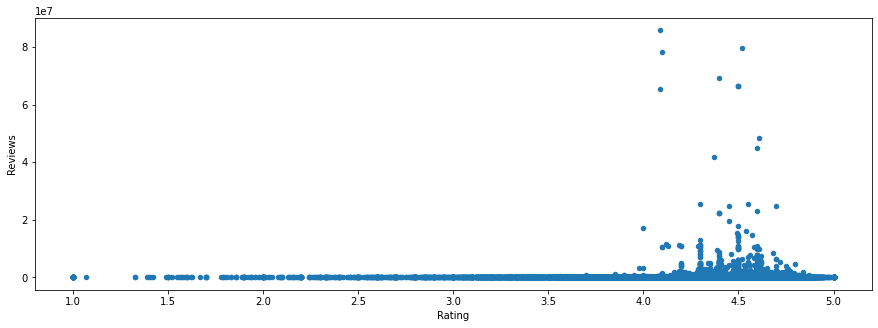

In [38]:
df.plot.scatter('Rating','Reviews',figsize=(15,5));

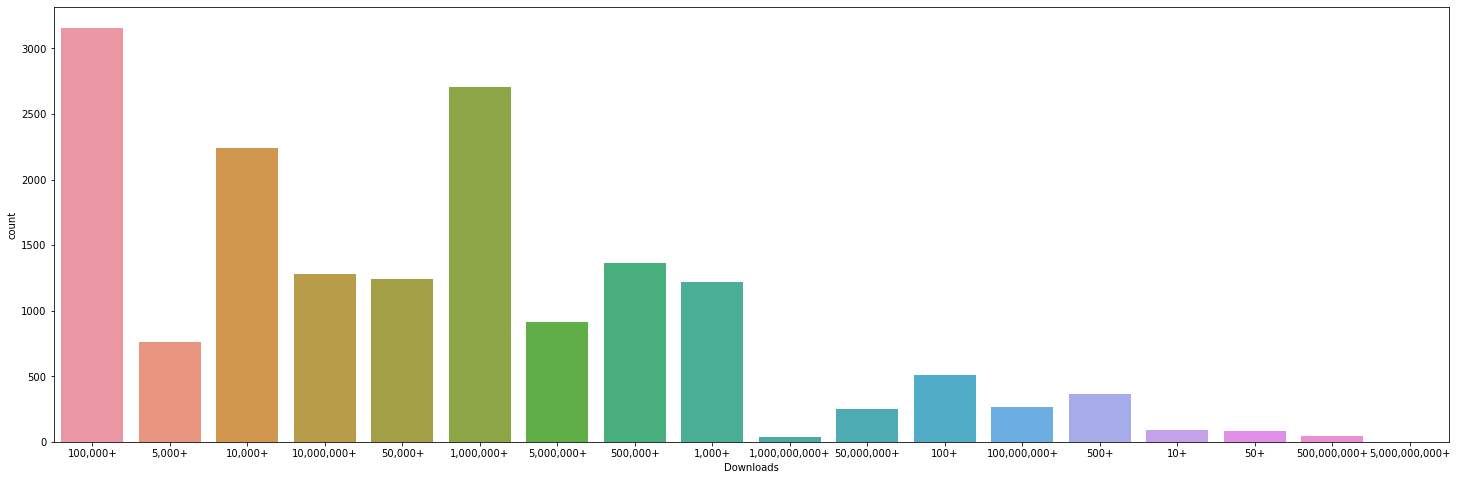

In [49]:
plt.figure(figsize=(25,8))
sns.countplot(df.Downloads);

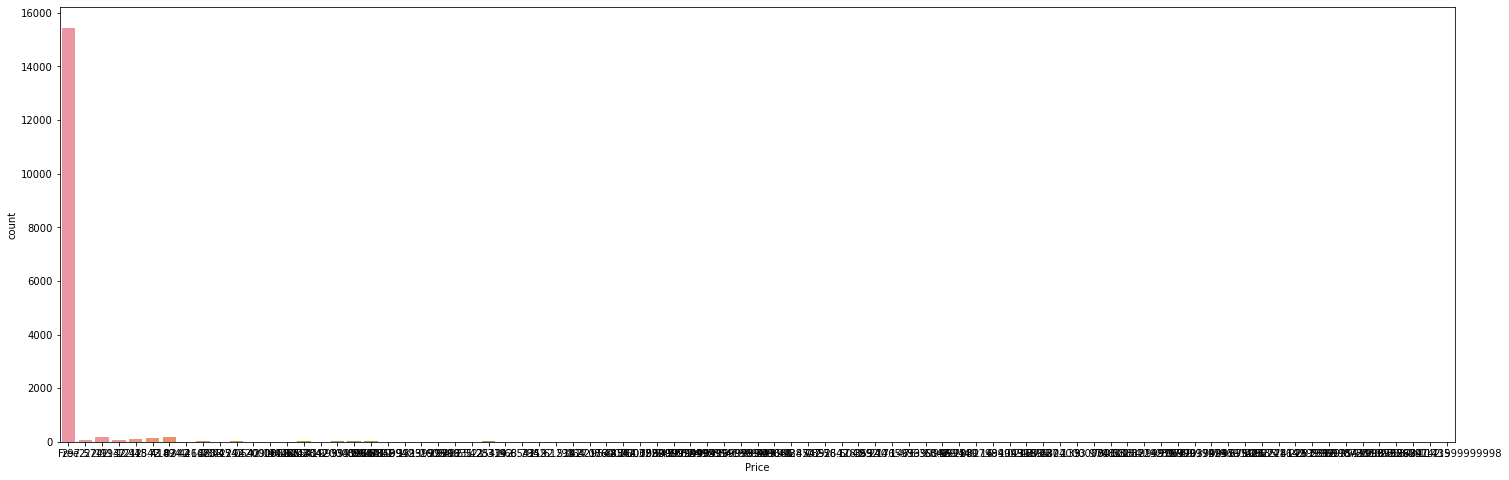

In [50]:
plt.figure(figsize=(25,8))
sns.countplot(df.Price);

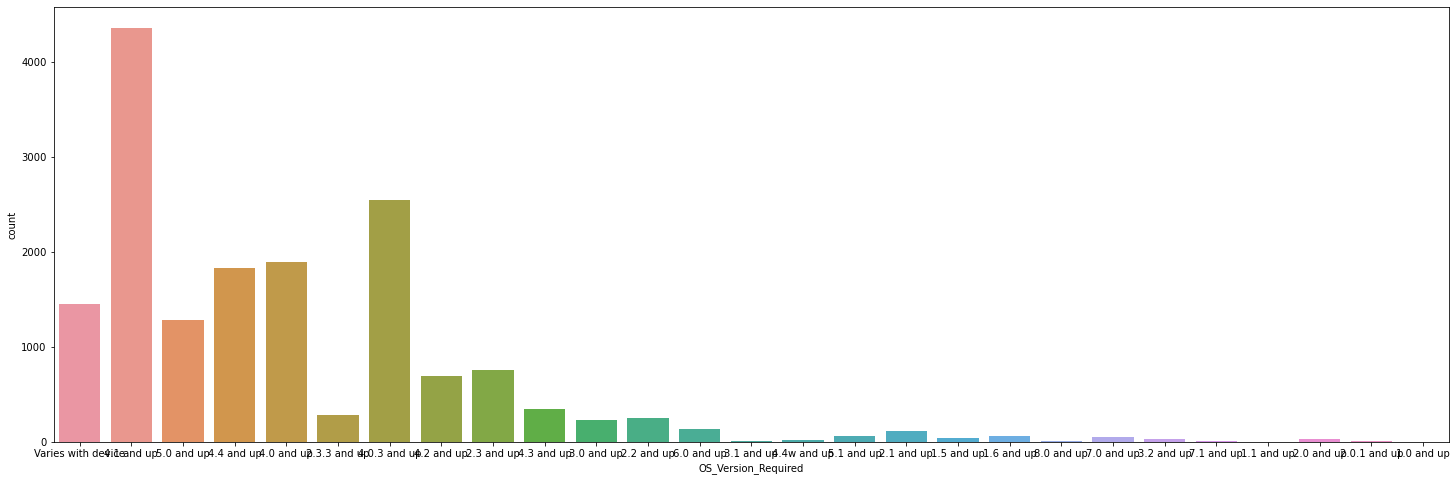

In [53]:
plt.figure(figsize=(25,8))
sns.countplot(df['OS_Version_Required']);

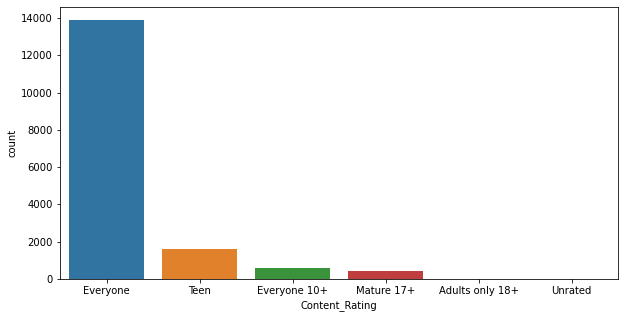

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(df['Content_Rating']);

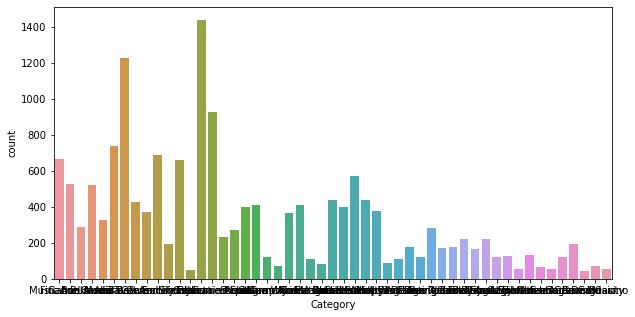

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(df['Category']);